In [56]:
# Imports
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [57]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [58]:
# Get raw 2.1.1 data
%store -r data_frame_2_1_1_preexclusions
data_frame = data_frame_2_1_1_preexclusions

In [59]:
# Clarify dataframe
study_test_df = data_frame.query('block_number > 0 and trial_period == trial_period')
test_df = study_test_df.query('trial_period == "test"')
test_df['correct'] = test_df['correct_side'] == test_df['chosen_side']
test_df['more_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].min(axis=1)
test_df['less_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].max(axis=1)
df = test_df

In [60]:
# Make blocks of a given size
group_size = 15

df['trial_num'] = df.groupby('uniqueid').cumcount()
df['trial_block_num'] = df['trial_num'] / group_size
df['trial_block_num'] = df['trial_block_num'].apply(math.floor)

In [61]:
# Get mean accuracy
accuracy_over_time = df.groupby('trial_block_num').agg({'correct': 'mean'}).reset_index()

In [64]:
# Get mean accuracy by subject
accuracy_over_time_by_subj = df.groupby(['trial_block_num', 'uniqueid']).agg({'correct': 'mean'}).reset_index()

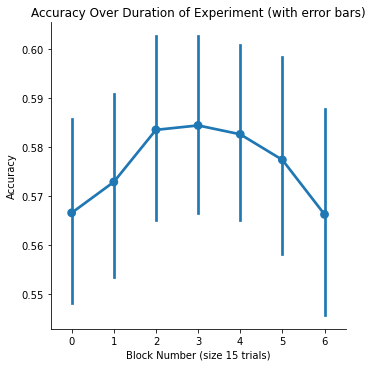

In [67]:
# Plot accuracy over time with error bars
fig = sns.catplot(x='trial_block_num', y='correct', data=accuracy_over_time_by_subj, kind='point')
fig.set(title='Accuracy Over Duration of Experiment (with error bars)', xlabel='Block Number (size 15 trials)', ylabel='Accuracy')
fig.savefig('accuracy_over_exp_err_bars.pdf')

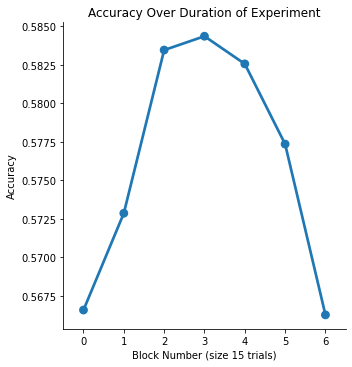

In [62]:
# Plot accuracy over time
fig = sns.catplot(x='trial_block_num', y='correct', data=accuracy_over_time, kind='point')
fig.set(title='Accuracy Over Duration of Experiment', xlabel='Block Number (size 15 trials)', ylabel='Accuracy')
fig.savefig('accuracy_over_exp.pdf')

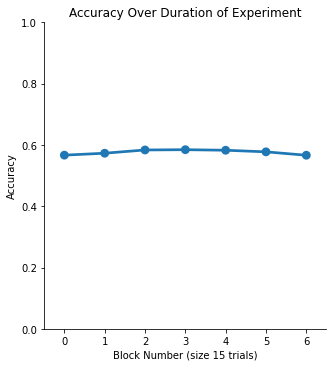

In [63]:
# Plot accuracy over time with a scaled y-axis
fig = sns.catplot(x='trial_block_num', y='correct', data=accuracy_over_time, kind='point')
fig.set(title='Accuracy Over Duration of Experiment', xlabel='Block Number (size 15 trials)', ylabel='Accuracy', ylim = [0, 1])
fig.savefig('accuracy_over_exp_adjusted_axis.pdf')

In [19]:
study_test_df = data_frame.query('block_number > 0 and trial_period == trial_period')
test_df = study_test_df.query('trial_period == "test"')
test_df['correct'] = test_df['correct_side'] == test_df['chosen_side']
test_df['more_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].min(axis=1)
test_df['less_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].max(axis=1)

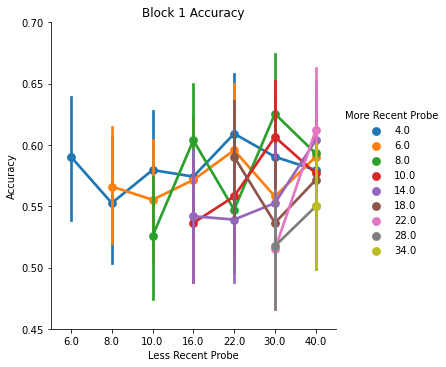

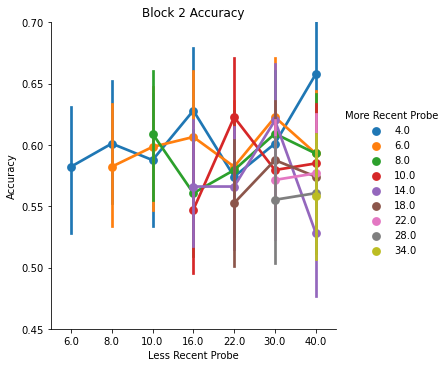

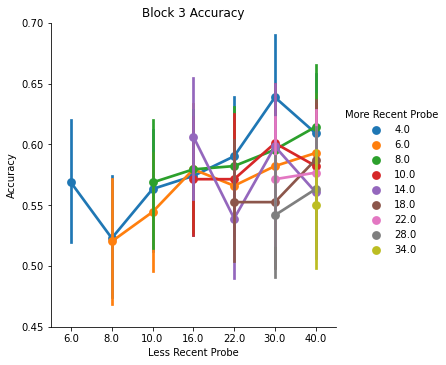

In [20]:
for i in range(1, 4):
    df = test_df.query('block_number ==' + str(i) + ' and trial_period == "test"')
    acc_by_comp_type_df = df.groupby(['uniqueid', 'more_recent_probe', 'less_recent_probe']).agg({'correct': 'mean'}).reset_index()
    fig = sns.catplot(x='less_recent_probe', y='correct', hue='more_recent_probe', data=acc_by_comp_type_df, kind='point')
    fig.set(title='Block ' + str(i) + ' Accuracy', ylim=(0.45, 0.7), xlabel='Less Recent Probe', ylabel='Accuracy')
    fig._legend.set_title("More Recent Probe")
    fig.savefig('block_' + str(i) + '_accuracy.pdf')
    


In [21]:
%store -r data_frame_2_1_1

In [22]:
study_test_df = data_frame_2_1_1.query('block_number > 0 and trial_period == trial_period')
test_df = study_test_df.query('trial_period == "test"')
test_df['correct'] = test_df['correct_side'] == test_df['chosen_side']
test_df['more_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].min(axis=1)
test_df['less_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].max(axis=1)

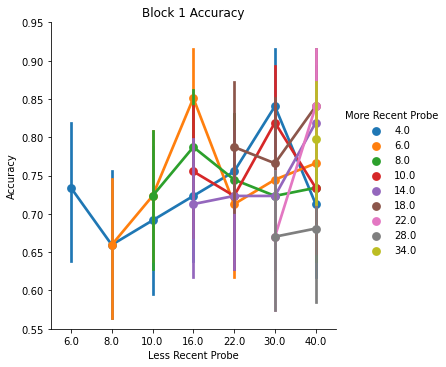

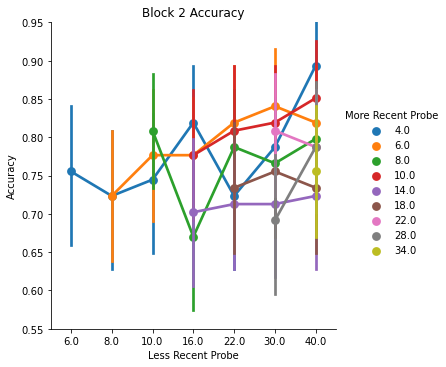

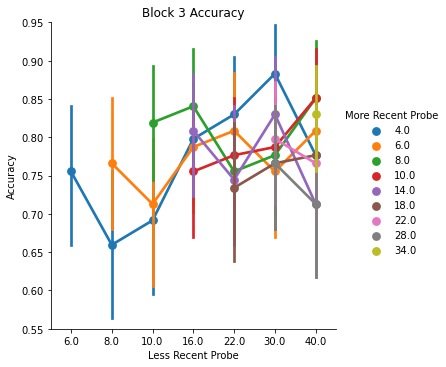

In [23]:
for i in range(1, 4):
    df = test_df.query('block_number ==' + str(i) + ' and trial_period == "test"')
    acc_by_comp_type_df = df.groupby(['uniqueid', 'more_recent_probe', 'less_recent_probe']).agg({'correct': 'mean'}).reset_index()
    fig = sns.catplot(x='less_recent_probe', y='correct', hue='more_recent_probe', data=acc_by_comp_type_df, kind='point')
    fig.set(title='Block ' + str(i) + ' Accuracy', ylim=(0.55, 0.95), xlabel='Less Recent Probe', ylabel='Accuracy')
    fig._legend.set_title("More Recent Probe")
    fig.savefig('block_' + str(i) + '_accuracy_filtered.pdf')
    


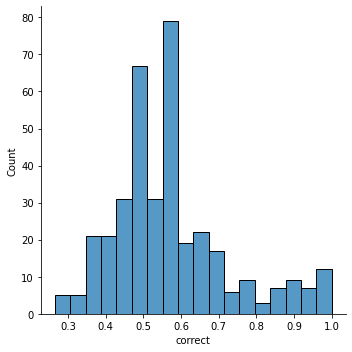

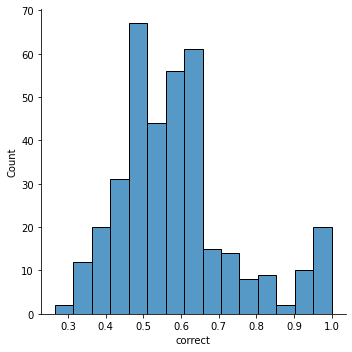

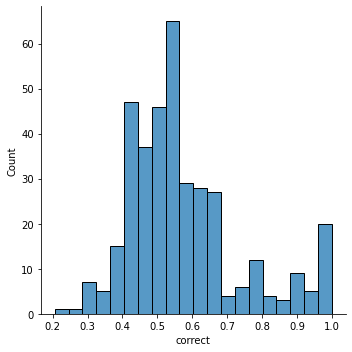

In [9]:
sns.displot(x='correct', data=acc1_df)
sns.displot(x='correct', data=acc2_df)
sns.displot(x='correct', data=acc3_df)